In [1]:
from DataUtils import *
import pandas as pd
import matplotlib.pyplot as plt

labels = ['text','label']

# Reading data set
    # Two Datasets
        1. Kaggle
        2. Reserach Articles News
        3. Data (Some news data)
        4. News data set
        5. Politifacts data set
        6. Train and test data set
    # Drop irrelevant columns

In [2]:
kaggle_data = getKaggleNewsDataSet()
print(kaggle_data.head())

research_data = getReserachArticleNewsDataSet()
research_data.head()

                                               title  \
0        Venezuelan leader blasts Rajoy, mocks Trump   
1  Trump’s fate may rest with former supporters o...   
2   White Police Officer Fired After Threatening ...   
3  ILLEGALS BEFORE AMERICAN CITIZENS: ACLU Sues 3...   
4  OUTRAGEOUS! MEMPHIS VOTES TO DIG UP CONFEDERAT...   

                                                text       subject  \
0  CARACAS (Reuters) - Venezuela s President Nico...     worldnews   
1  COLUMBUS, Ohio (Reuters) - Donald Trump’s pres...  politicsNews   
2  Just before midnight on Friday, July 8, LaNayd...          News   
3  Obama s fundamental transformation of America ...     left-news   
4  THE CLEANSING OF OUR HISTORY CONTINUES What th...      politics   

                  date  label  
0  September 27, 2017       1  
1  September 14, 2016       1  
2        July 10, 2016      0  
3         Oct 19, 2015      0  
4         Jul 10, 2015      0  


,text,label
0,House Speaker Nancy Pelosi (D-CA) celebrate...,0
1,"Nearly three weeks after Saudi Arabia, Bahr...",1
2,Twitter suspended a number of accounts assoc...,0
3,"When it comes to disease and health, which ...",1
4,Pintucci was wounded about 10:15 p.m. Thursd...,1


# Visualizing data set

## Kaggle : How many articles per subject?

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


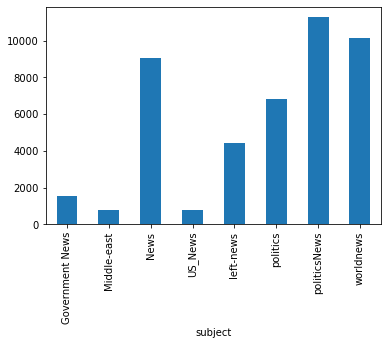

In [3]:
print(kaggle_data.groupby(['subject'])['text'].count())
kaggle_data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

## Kaggle : How many fake and real articles?

label
0    23481
1    21417
Name: text, dtype: int64


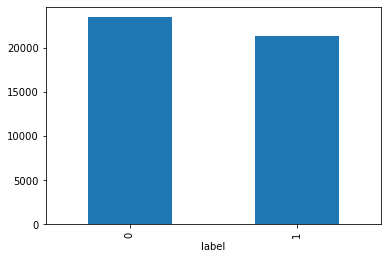

In [4]:
print(kaggle_data.groupby(['label'])['text'].count())
kaggle_data.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

## Research Article News : How many fake and real articles?

label
0    90
1    80
Name: text, dtype: int64


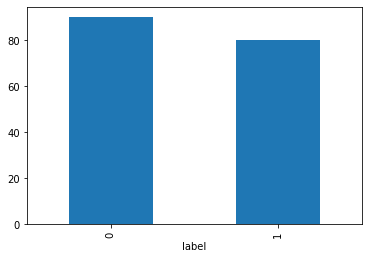

In [5]:
print(research_data.groupby(['label'])['text'].count())
research_data.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

## GET TEXT COLUMNS DF

In [6]:
kaggle_fake=kaggle_data[kaggle_data["label"]==0]
kaggle_real=kaggle_data[kaggle_data["label"]==1]

research_fake=research_data[research_data["label"]==0]
research_real=research_data[research_data["label"]==1]

## Kaggel : Word Cloud

### Fake

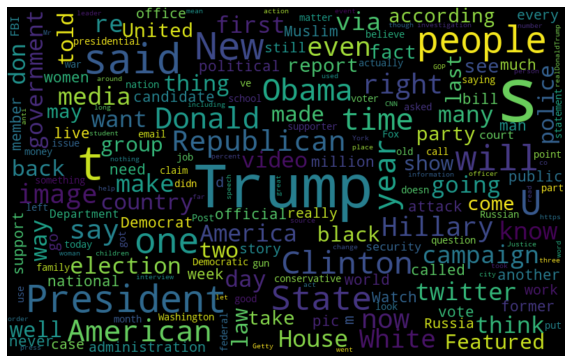

In [7]:
word_cloud(kaggle_fake, "text")

### Real

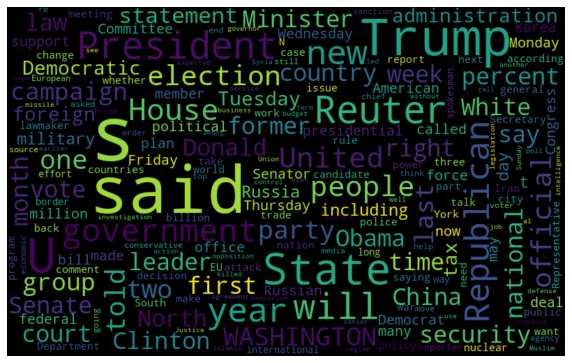

In [8]:
word_cloud(kaggle_real, "text")

## Research News : Word Cloud

### Fake

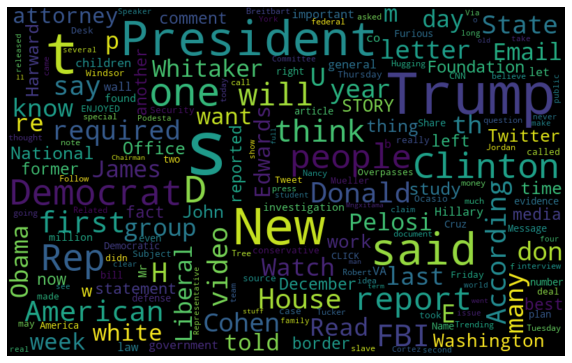

In [9]:
word_cloud(research_fake, "text")

### Real

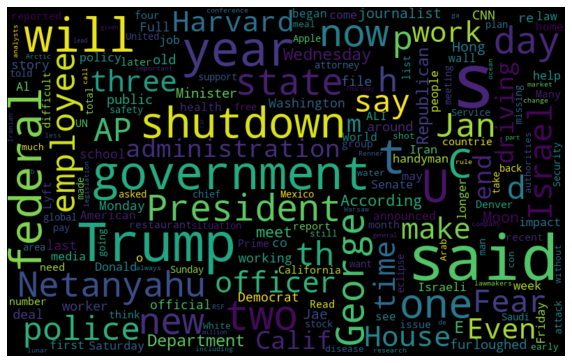

In [10]:
word_cloud(research_real, "text")

## Kaggel Word counts and frequency

### Fake

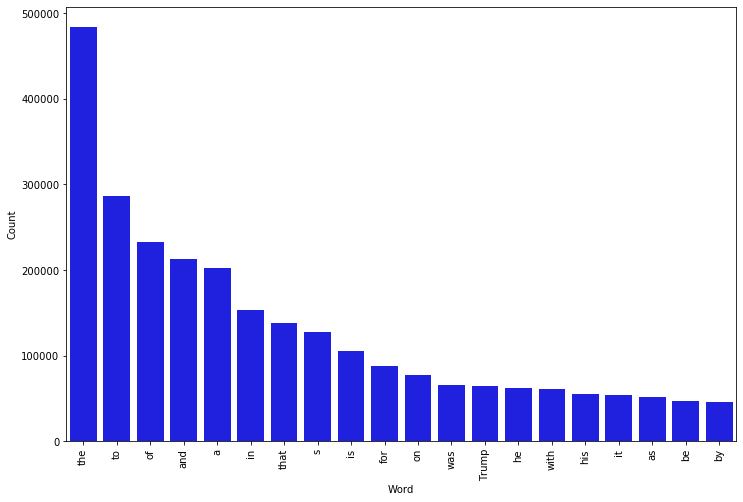

In [11]:
frequency(kaggle_fake, "text", 20)

### Real

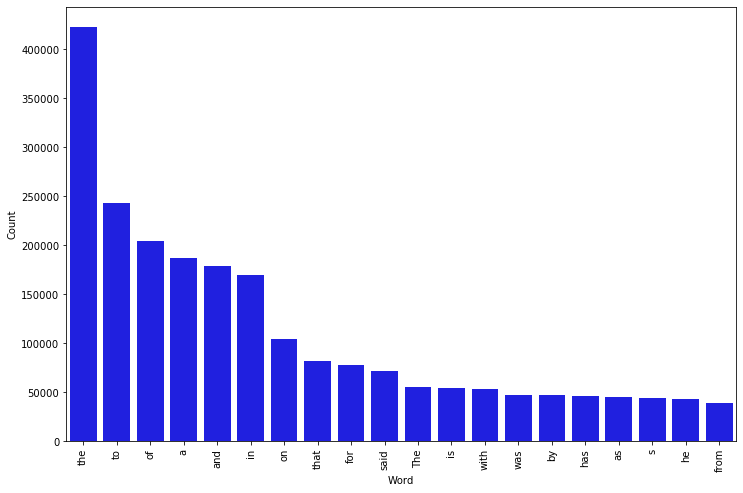

In [12]:
frequency(kaggle_real, "text", 20)

## Research Word counts and frequency

### Fake

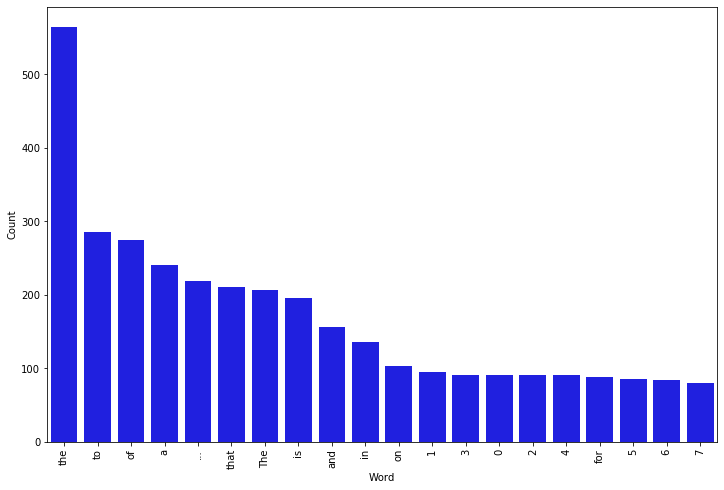

In [13]:
frequency(research_fake, "text", 20)

### Real

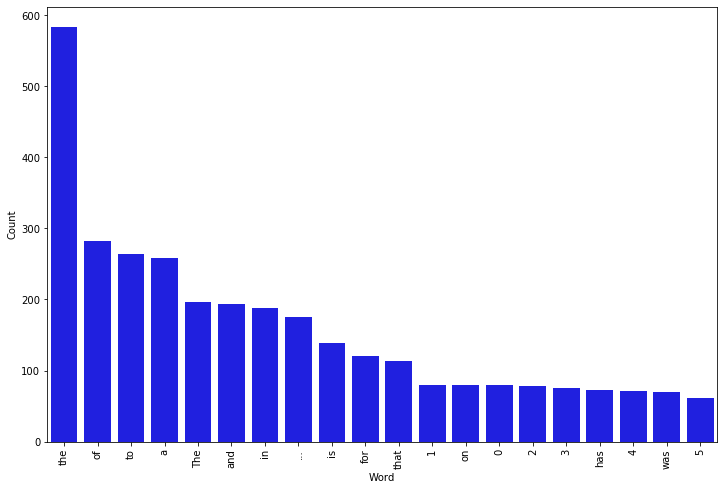

In [14]:
frequency(research_real, "text", 20)

## Data Dataset

In [15]:
dataset = pd.read_csv("./data/data.csv")
dataset["text"] = dataset["Headline"] + dataset["Body"]
dataset.sample(frac = 1) #Shuffle 100%
dataset["label"] = dataset["Label"]
dataset = dataset.loc[:,['text','label']]
dataset = dataset.dropna()


# def wordpre(text):
#     text = text.lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text) # remove special chars
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     return text

# dataset.head()

# dataset['text']=dataset['text'].apply(wordpre)


## News Dataset

In [16]:
newsdataset = pd.read_csv("./data/news.csv")

newsdataset["text"] = newsdataset["title"] + newsdataset["text"]
newsdataset.sample(frac = 1) #Shuffle 100%

newsdataset.label[newsdataset.label == 'REAL'] = 1
newsdataset.label[newsdataset.label == 'FAKE'] = 0

newsdataset["text"] = newsdataset["text"].astype(str)
newsdataset['label'] = newsdataset['label'].astype(int) 

newsdataset = newsdataset.loc[:,['text','label']]
newsdataset = newsdataset.dropna()

<ipython-input-16-2e4810e3285a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsdataset.label[newsdataset.label == 'REAL'] = 1
<ipython-input-16-2e4810e3285a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsdataset.label[newsdataset.label == 'FAKE'] = 0


## Politifact Dataset

In [17]:
politifact_real = pd.read_csv("./data/politifact_real.csv")
politifact_fake = pd.read_csv("./data/politifact_fake.csv")
politifact_real['label']= 1
politifact_fake['label']= 0
politifact = pd.concat([politifact_real, politifact_fake])
politifact["text"] = politifact["title"]

politifact["text"] = politifact["text"].astype(str)
politifact['label'] = politifact['label'].astype(int) 

politifact.sample(frac = 1) #Shuffle 100%
politifact = politifact.loc[:,['text','label']]

print(politifact.head())

                                                text  label
0        National Federation of Independent Business      1
1                        comments in Fayetteville NC      1
2  Romney makes pitch, hoping to close deal : Ele...      1
3  Democratic Leaders Say House Democrats Are Uni...      1
4    Budget of the United States Government, FY 2008      1


## Train Dataset

In [18]:
traindataset = pd.read_csv("./data/train.csv")
traindataset["text"] = traindataset["title"] + traindataset["text"]
traindataset.sample(frac = 1) #Shuffle 100%

traindataset["text"] = traindataset["text"].astype(str)
traindataset['label'] = traindataset['label'].astype(int) 

traindataset = traindataset.loc[:,['text','label']]
traindataset = traindataset.dropna()

## Data Cleaning

### Kaggle - Drop irrelevant columns 

In [19]:
kaggle_data["Article"] = kaggle_data["title"] + kaggle_data["text"]
kaggle_data.drop(['title', 'subject', 'date', 'text'],axis=1,inplace=True)

kaggle_data["text"] = kaggle_data["Article"]
kaggle_data.drop(['Article'],axis=1,inplace=True)
print(kaggle_data.head())

   label                                               text
0      1  Venezuelan leader blasts Rajoy, mocks TrumpCAR...
1      1  Trump’s fate may rest with former supporters o...
2      0   White Police Officer Fired After Threatening ...
3      0  ILLEGALS BEFORE AMERICAN CITIZENS: ACLU Sues 3...
4      0  OUTRAGEOUS! MEMPHIS VOTES TO DIG UP CONFEDERAT...


### Remove Stopwords and Punctuations

In [20]:
clean_data(kaggle_data, ["text"])
clean_data(research_data, ["text"])
clean_data(dataset, ["text"])
clean_data(newsdataset, ["text"])
clean_data(politifact, ["text"])
clean_data(traindataset, ["text"])

## Combine both dataset

In [21]:
all_data = kaggle_data.append(research_data, ignore_index=True, sort=False)
all_data = all_data.append(dataset, ignore_index=True, sort=False)
all_data = all_data.append(newsdataset, ignore_index=True, sort=False)
all_data = all_data.append(politifact, ignore_index=True, sort=False)
all_data = all_data.append(traindataset, ignore_index=True, sort=False)
all_data.head()

,label,text
0,1,venezuelan leader blast rajoy mock trumpcaraca...
1,1,trump fate may rest former supporter archcriti...
2,0,white police officer fired threatening black ...
3,0,illegals american citizen aclu sue 3 missouri ...
4,0,outrageous memphis vote dig confederate genera...


### Data visualization after cleanup

label
0    39674
1    37573
Name: text, dtype: int64


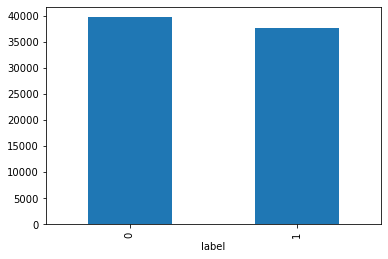

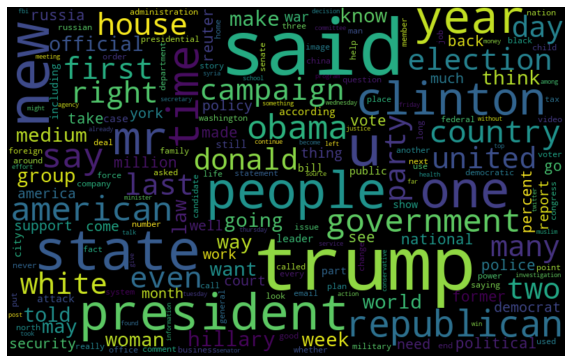

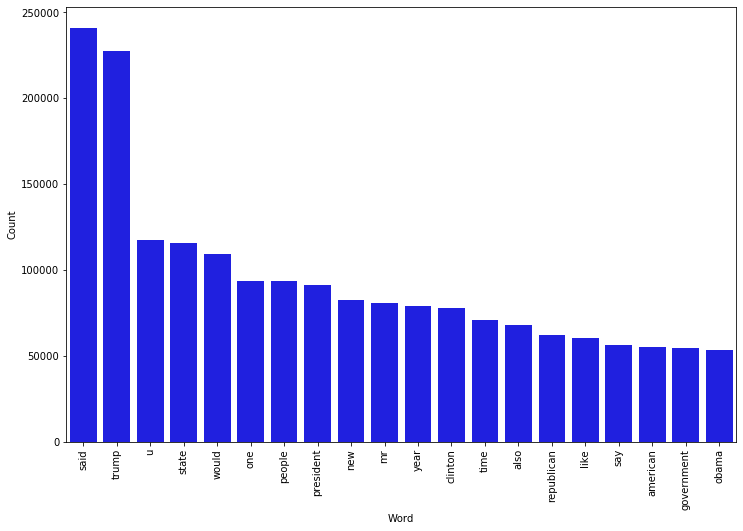

In [22]:
print(all_data.groupby(['label'])['text'].count())
all_data.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

word_cloud(all_data, "text")

frequency(all_data, "text", 20)

### Split to train, test

In [23]:
# train_data, test_data, train_labels, test_labels = split_data(kaggle_data, labels)
train_data, test_data, train_labels, test_labels = train_test_split(all_data['text'].values,
                                                                    all_data['label'].values,
                                                                    test_size=0.2, random_state=42, shuffle="false")

# print("X_train shape: {}".format(train_data))
# print("X_test shape: {}".format(test_data))
# print("y_train shape: {}".format(train_labels))
# print("y_test shape: {}".format(test_labels))


# Logistic regression:

In [24]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import seaborn as sns    

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
LRModel = pipe.fit(train_data, train_labels)
print(train_labels)
# Accuracy
prediction = LRModel.predict(test_data)
LRModel_accuracy = round(accuracy_score(test_labels, prediction)*100,2)
print("accuracy: {}%".format(LRModel_accuracy))
cm = metrics.confusion_matrix(test_labels, prediction)

[1 0 1 ... 1 1 1]
accuracy: 87.0%


In [25]:
#Checking the performance of our model
test_labels=test_labels.astype('int')

print(classification_report(test_labels, prediction))
print(confusion_matrix(test_labels, prediction))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      7881
           1       0.89      0.84      0.86      7569

    accuracy                           0.87     15450
   macro avg       0.87      0.87      0.87     15450
weighted avg       0.87      0.87      0.87     15450

[[7085  796]
 [1212 6357]]


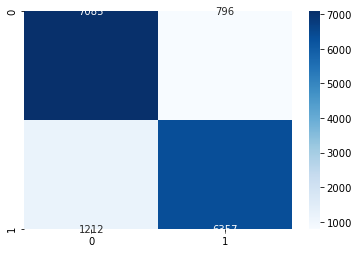

In [26]:
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')

## Decision Tree Classifier:

In [27]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
DTCModel = pipe.fit(train_data, train_labels)
# Accuracy
prediction = DTCModel.predict(test_data)

DTCModel_accuracy = round(accuracy_score(test_labels, prediction)*100,2)
print("accuracy: {}%".format(DTCModel_accuracy))

cm = metrics.confusion_matrix(test_labels, prediction)

print(classification_report(test_labels, prediction))
print(confusion_matrix(test_labels, prediction))


accuracy: 83.04%
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      7881
           1       0.81      0.85      0.83      7569

    accuracy                           0.83     15450
   macro avg       0.83      0.83      0.83     15450
weighted avg       0.83      0.83      0.83     15450

[[6375 1506]
 [1114 6455]]


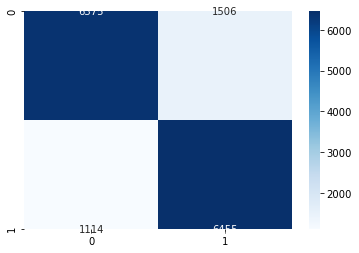

In [28]:
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
# Fitting the model
RFCModel = pipe.fit(train_data, train_labels)
# Accuracy
prediction = RFCModel.predict(test_data)

RFCModel_accuracy = round(accuracy_score(test_labels, prediction)*100,2)
print("accuracy: {}%".format(RFCModel_accuracy))
      
cm = metrics.confusion_matrix(test_labels, prediction)

print(classification_report(test_labels, prediction))
print(confusion_matrix(test_labels, prediction))


accuracy: 81.95%
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      7881
           1       0.85      0.77      0.81      7569

    accuracy                           0.82     15450
   macro avg       0.82      0.82      0.82     15450
weighted avg       0.82      0.82      0.82     15450

[[6861 1020]
 [1768 5801]]


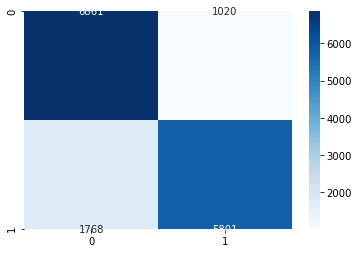

In [30]:
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')

In [31]:
from sklearn.linear_model import SGDClassifier

#Stochastic Gradient Descent
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])

# Fitting the model
SGDmodel = pipe.fit(train_data, train_labels)
# Accuracy
prediction = SGDmodel.predict(test_data)

SGDmodel_accuracy = round(accuracy_score(test_labels, prediction)*100,2)
print("accuracy: {}%".format(SGDmodel_accuracy))

cm = metrics.confusion_matrix(test_labels, prediction)

print(classification_report(test_labels, prediction))
print(confusion_matrix(test_labels, prediction))


accuracy: 86.2%
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      7881
           1       0.90      0.81      0.85      7569

    accuracy                           0.86     15450
   macro avg       0.87      0.86      0.86     15450
weighted avg       0.86      0.86      0.86     15450

[[7168  713]
 [1419 6150]]


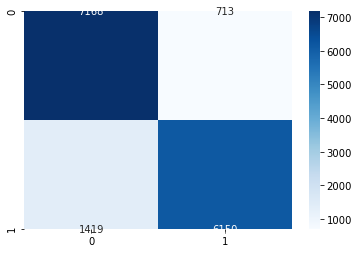

In [32]:
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')

In [33]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])


# Fitting the model
GBCmodel = pipe.fit(train_data, train_labels)
# Accuracy
prediction = GBCmodel.predict(test_data)

GBCmodel_accuracy = round(accuracy_score(test_labels, prediction)*100,2)
print("accuracy: {}%".format(GBCmodel_accuracy))

cm = metrics.confusion_matrix(test_labels, prediction)

print(classification_report(test_labels, prediction))
print(confusion_matrix(test_labels, prediction))

accuracy: 79.21%
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      7881
           1       0.98      0.59      0.73      7569

    accuracy                           0.79     15450
   macro avg       0.85      0.79      0.78     15450
weighted avg       0.84      0.79      0.78     15450

[[7794   87]
 [3125 4444]]


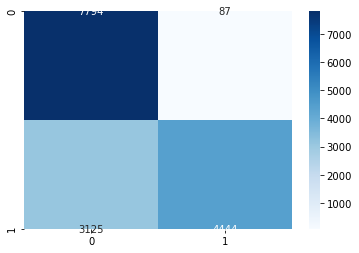

In [34]:
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')

In [35]:
#########XGBClassifier
# from xgboost import XGBClassifier
# pipe = Pipeline([('vect', CountVectorizer()),
#                  ('tfidf', TfidfTransformer()),
#                  ('model', XGBClassifier(loss = 'deviance',
#                                                    learning_rate = 0.01,
#                                                    n_estimators = 10,
#                                                    max_depth = 5,
#                                                    random_state=2020))])


# # Fitting the model
# xgboostmodel = pipe.fit(train_data, train_labels)
# # Accuracy
# prediction = xgboostmodel.predict(test_data)
# print("accuracy: {}%".format(round(accuracy_score(test_labels, prediction)*100,2)))

# cm = metrics.confusion_matrix(test_labels, prediction)

# print(classification_report(test_labels, prediction))
# print(confusion_matrix(test_labels, prediction))

In [36]:
#######Multinomial Naive Bayes Classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

# Fitting the model
MNBCmodel = pipe.fit(train_data, train_labels)
# Accuracy
prediction = MNBCmodel.predict(test_data)

MNBCmodel_accuracy = round(accuracy_score(test_labels, prediction)*100,2)
print("accuracy: {}%".format(MNBCmodel_accuracy))

cm = metrics.confusion_matrix(test_labels, prediction)

print(classification_report(test_labels, prediction))
print(confusion_matrix(test_labels, prediction))

accuracy: 80.14%
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      7881
           1       0.85      0.73      0.78      7569

    accuracy                           0.80     15450
   macro avg       0.81      0.80      0.80     15450
weighted avg       0.81      0.80      0.80     15450

[[6893  988]
 [2081 5488]]


In [37]:
#############Bernoulli Naive Bayes Classifier
from sklearn.naive_bayes import BernoulliNB
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

# Fitting the model
BNBCmodel = pipe.fit(train_data, train_labels)
# Accuracy
prediction = BNBCmodel.predict(test_data)

BNBCmodel_accuracy = round(accuracy_score(test_labels, prediction)*100,2)
print("accuracy: {}%".format(BNBCmodel_accuracy))

cm = metrics.confusion_matrix(test_labels, prediction)

print(classification_report(test_labels, prediction))
print(confusion_matrix(test_labels, prediction))

accuracy: 78.12%
              precision    recall  f1-score   support

           0       0.80      0.75      0.78      7881
           1       0.76      0.81      0.78      7569

    accuracy                           0.78     15450
   macro avg       0.78      0.78      0.78     15450
weighted avg       0.78      0.78      0.78     15450

[[5950 1931]
 [1449 6120]]


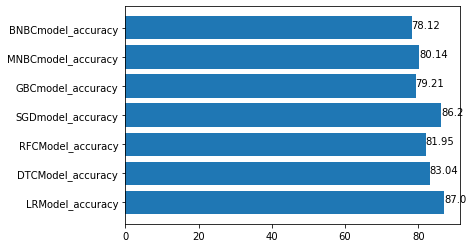

In [40]:
x = ["LRModel_accuracy",
     "DTCModel_accuracy",
     "RFCModel_accuracy",
     "SGDmodel_accuracy",
     "GBCmodel_accuracy",
     "MNBCmodel_accuracy",
     "BNBCmodel_accuracy"]
y =  [LRModel_accuracy,
     DTCModel_accuracy,
     RFCModel_accuracy,
     SGDmodel_accuracy,
     GBCmodel_accuracy,
     MNBCmodel_accuracy,
     BNBCmodel_accuracy]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

In [ ]:
# import pickle
# #Serialising the file
# with open('model.pickle', 'wb') as handle:
#     pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [41]:
import joblib  
        
joblib.dump(LRModel, 'LRModel.pkl')
joblib.dump(DTCModel, 'DTCModel.pkl')
joblib.dump(RFCModel, 'RFCModel.pkl')
joblib.dump(SGDmodel, 'SGDModel.pkl')
joblib.dump(GBCmodel, 'GBCModel.pkl')
joblib.dump(MNBCmodel, 'MNBCModel.pkl')
joblib.dump(BNBCmodel, 'BNBCModel.pkl')

['BNBCModel.pkl']